# Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import pylab

#OUR RESULTS

In [2]:
our_bpp_bike = np.array([0.001905881711341,0.005170190603441,0.020299097428626,0.100543680636981,0.751624704823712])
our_psnr_bike = np.array([28.75005384615385, 32.32903846153847, 35.80243076923077, 39.87543076923077, 45.03168461538462])

our_bpp_danger  = np.array([0.002017047964443,0.005155356802007,0.020271873040111,0.100327281651351,0.749115349166962])
our_psnr_danger = np.array([27.281830769230773, 30.5444, 33.5076923076923, 37.84881538461538, 42.91032307692308])

our_bpp_fountain  = np.array([0.001587216753470,0.005159545169471,0.020148490715240,0.100281384124560,0.751730635617484])
our_psnr_fountain = np.array([29.076007692307694, 31.758446153846155, 34.34880769230769, 39.08803076923077, 43.63383076923078])

our_bpp_stone = np.array([0.001962948218035,0.005166525781910,0.020406075314264,0.100458517165217,0.750065585035312])
our_psnr_stone = np.array([30.344138461538464, 33.11010769230769, 36.14628461538462, 40.00522307692308, 44.46865384615384])

In [3]:
!pip install bd-metric

In [4]:
import numpy as np
import scipy.interpolate

def BD_PSNR(R1, PSNR1, R2, PSNR2, piecewise=0):
    lR1 = np.log(R1)
    lR2 = np.log(R2)

    p1 = np.polyfit(lR1, PSNR1, 3)
    p2 = np.polyfit(lR2, PSNR2, 3)

    # integration interval
    min_int = max(min(lR1), min(lR2))
    max_int = min(max(lR1), max(lR2))

    # find integral
    if piecewise == 0:
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)
    else:
        # See https://chromium.googlesource.com/webm/contributor-guide/+/master/scripts/visual_metrics.py
        lin = np.linspace(min_int, max_int, num=100, retstep=True)
        interval = lin[1]
        samples = lin[0]
        v1 = scipy.interpolate.pchip_interpolate(np.sort(lR1), np.sort(PSNR1), samples)
        v2 = scipy.interpolate.pchip_interpolate(np.sort(lR2), np.sort(PSNR2), samples)
        # Calculate the integral using the trapezoid method on the samples.
        int1 = np.trapz(v1, dx=interval)
        int2 = np.trapz(v2, dx=interval)

    # find avg diff
    avg_diff = (int2-int1)/(max_int-min_int)

    return avg_diff


def BD_RATE(R1, PSNR1, R2, PSNR2, piecewise=0):
    lR1 = np.log(R1)
    lR2 = np.log(R2)

    # rate method
    p1 = np.polyfit(PSNR1, lR1, 3)
    p2 = np.polyfit(PSNR2, lR2, 3)

    # integration interval
    min_int = max(min(PSNR1), min(PSNR2))
    max_int = min(max(PSNR1), max(PSNR2))

    # find integral
    if piecewise == 0:
        p_int1 = np.polyint(p1)
        p_int2 = np.polyint(p2)

        int1 = np.polyval(p_int1, max_int) - np.polyval(p_int1, min_int)
        int2 = np.polyval(p_int2, max_int) - np.polyval(p_int2, min_int)
    else:
        lin = np.linspace(min_int, max_int, num=100, retstep=True)
        interval = lin[1]
        samples = lin[0]
        v1 = scipy.interpolate.pchip_interpolate(np.sort(PSNR1), np.sort(lR1), samples)
        v2 = scipy.interpolate.pchip_interpolate(np.sort(PSNR2), np.sort(lR2), samples)
        # Calculate the integral using the trapezoid method on the samples.
        int1 = np.trapz(v1, dx=interval)
        int2 = np.trapz(v2, dx=interval)

    # find avg diff
    avg_exp_diff = (int2-int1)/(max_int-min_int)
    avg_diff = (np.exp(avg_exp_diff)-1)*100
    return avg_diff

#Bike

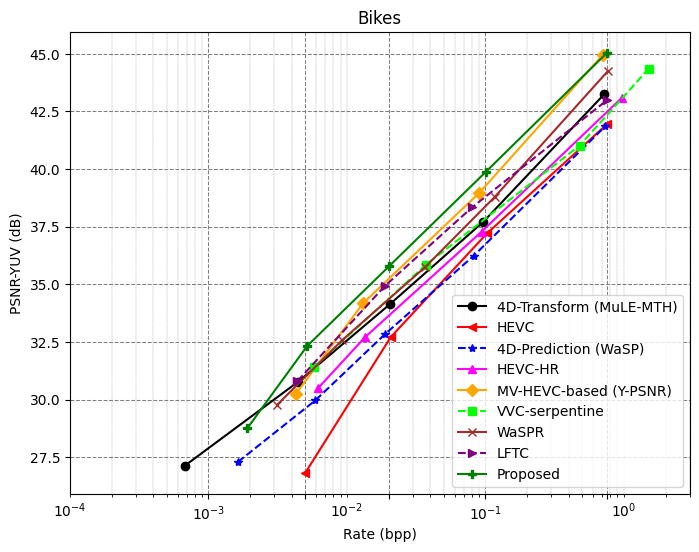

BD-RATE:  -69.29195852422563


In [14]:

import numpy as np
import matplotlib.pyplot as plt

# Dataset

imageID = "Bikes"
_4d_transform_bpp = np.array([0.000677281527744142, 0.004458931178088869, 0.02059900077052175, 0.09651957137350717, 0.7218742302277095])
_4d_transform_psnr = np.array([ 27.138166681120456, 30.78170150030353, 34.15639580261903, 37.711404041280026, 43.248339259387734 ])

hevc_bpp = np.array([0.00499414949579796,0.020745460373129958,0.10287448931204286,0.7532221397586232,])
hevc_psnr = np.array([26.812713554765416,32.71329459717284,37.21503772439511,41.94035209435435])

_4d_prediction_bpp = np.array([0.0016304507778857039,0.005919808968331406,0.018920084727722997,0.0825891653097646,0.7321758239537127])
_4d_prediction_psnr = np.array([27.291700633076058,29.968589020900183,32.84903304136675,36.24655277079178,41.85029919347845])

hevc_hr_bpp = np.array([0.0062207987815499615,0.013561498876114976,0.09382264934578687,0.9651957137350706])
hevc_hr_psnr = np.array([30.50949614083774,32.715375943109876,37.283132425635245,43.08908160610528])

mv_hevc_based_bpp = np.array([0.004273357542109325,0.013089500587049153,0.09055721899982201,0.7066929669805664])
mv_hevc_based_psnr = np.array([30.24075969126702,34.1811638192698, 38.974399444974416, 44.96208481484693])

vvc_bpp = np.array([0.005836518227320607,0.037087774117744686,0.47863009232263803,1.5082090361779894,])
vvc_psnr = np.array([31.434272829763245,35.844610181250545,41.01810770965224,44.349579394675224])

waspr_bpp = np.array([0.0031288490794427037,0.009250258006155622,0.03682594041720447,0.1168671108510349,0.7694029482872682])
waspr_psnr = np.array([29.76877981094441,32.58196166854566,35.75445321307779,38.79276732286879,44.26268320180383])


lftc_bpp = np.array([0.004396194747922639,0.018920084727723035,0.08028148267084172,0.7585775750291828])
lftc_psnr = np.array([30.804318792819355,34.945989072933834,38.34364755875466,43.0000693781979])

our_bpp = np.array([0.001905881711341,0.005170190603441,0.020299097428626,0.100543680636981,0.751624704823712])
our_psnr = np.array([28.75005384,32.32903846,35.80243076,39.87543076,45.03168461])

fig, ax = plt.subplots(figsize=(8,6))
# Plotting the Graph
plt.plot(_4d_transform_bpp, _4d_transform_psnr, marker="o",  color='black', label="4D-Transform (MuLE-MTH)")
plt.plot(hevc_bpp, hevc_psnr, marker="<", color='red', label="HEVC")
plt.plot(_4d_prediction_bpp, _4d_prediction_psnr, marker="*", linestyle='dashed', color='blue', label="4D-Prediction (WaSP)")
plt.plot(hevc_hr_bpp, hevc_hr_psnr, marker='^',  color='magenta', label="HEVC-HR")
plt.plot(mv_hevc_based_bpp, mv_hevc_based_psnr, marker='D',  color='orange', label="MV-HEVC-based (Y-PSNR)")
plt.plot(vvc_bpp, vvc_psnr, marker='s', linestyle='dashed', color='lime', label="VVC-serpentine")
plt.plot(waspr_bpp, waspr_psnr, marker='x', color='brown', label="WaSPR")
plt.plot(lftc_bpp, lftc_psnr, marker='>', color='purple',linestyle='dashed', label="LFTC")
plt.plot(our_bpp, our_psnr, marker='P', color='green', label="Proposed")

plt.title(imageID)
plt.xlabel("Rate (bpp)")
plt.ylabel("PSNR-YUV (dB)")
plt.xscale('log')
plt.legend(loc='lower right')
a = np.arange(0.0001, 0.001, 0.0001)
b = np.arange(0.001, 0.01, 0.001)
c = np.arange(0.01, 0.1, 0.01)
d = np.arange(0.1, 1.0, 0.1)
e = np.arange(1.0, 4.0, 1.0)
f = np.concatenate((a,b,c,d,e), axis=-1)
ax.set_xticks([ 0.001, 0.005, 0.02, 0.1, 0.75])
ax.grid(which='major', linestyle='dashed', linewidth='0.75', color='gray')
ax.set_xticks(f, minor=True)
ax.grid(which='minor', linestyle='dashed', linewidth='0.25', color='gray')
plt.savefig(imageID+'.eps', format='eps',bbox_inches='tight')
plt.show()

print('BD-RATE: ', BD_RATE(hevc_bpp, hevc_psnr, our_bpp, our_psnr, 1))

In [6]:
#Bike
our_bpp_bike = np.array([0.001905881711341,0.005170190603441,0.020299097428626,0.100543680636981,0.751624704823712])
our_psnr_bike = np.array([28.75005384615385, 32.32903846153847, 35.80243076923077, 39.87543076923077, 45.03168461538462])

hevc_bpp = np.array([0.00499414949579796,0.020745460373129958,0.10287448931204286,0.7532221397586232,])
hevc_psnr = np.array([26.812713554765416,32.71329459717284,37.21503772439511,41.94035209435435])

print('BD-RATE: ', BD_RATE(hevc_bpp, hevc_psnr, our_bpp_bike, our_psnr_bike, 1))

BD-RATE:  -69.29195859682818


#Danger

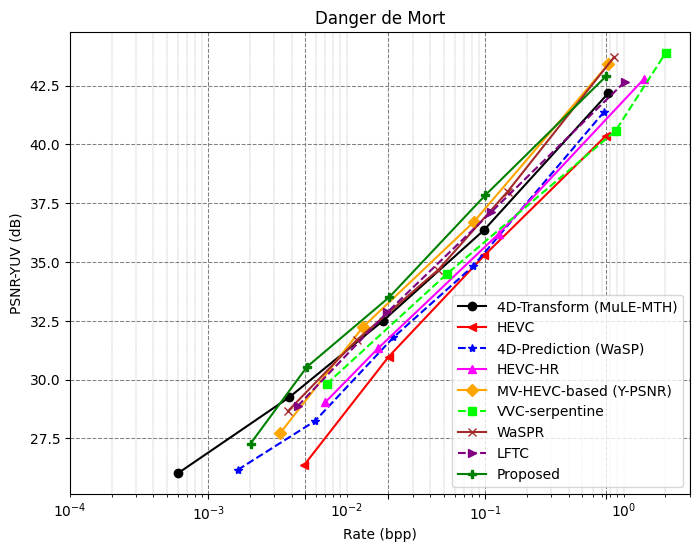

In [7]:

import numpy as np
import matplotlib.pyplot as plt



# Dataset

imageID = "Danger de Mort"
_4d_transform_bpp = np.array([ 0.0006052453537078883, 0.0038243225749637613, 0.01826763152870828, 0.09787104053000563, 0.7724145878562744])
_4d_transform_psnr = np.array([ 26.02622576966933, 29.241733181299892, 32.502850627137974 , 36.3568985176739, 42.172177879133415])

hevc_bpp = np.array([ 0.004915738648921726, 0.020053061482507892, 0.09857560935876752, 0.7452022256417974 ])
hevc_psnr = np.array([ 26.368301026225772, 30.97491448118587, 35.28506271379704, 40.37058152793615 ])

_4d_prediction_bpp = np.array([ 0.0016286884113172959, 0.005881260349042844, 0.021699443598788563, 0.08180363187319732, 0.724124237358595])
_4d_prediction_psnr = np.array([ 26.16305587229191, 28.23831242873433, 31.795895096921328, 34.828962371721786, 41.39680729760548])

hevc_hr_bpp = np.array([ 0.006986131564635885, 0.016881628163287938, 0.12490309751396225, 1.3909200922640785])
hevc_hr_psnr = np.array([ 29.036488027366026, 31.339794754846068, 36.19726339794755, 42.76510832383125])

mv_hevc_based_bpp = np.array([ 0.003313211965966809, 0.013039615860088925, 0.08239253221373981, 0.7724145878562751 ])
mv_hevc_based_psnr = np.array([ 27.73660205245154, 32.229190421892824, 36.69897377423034, 43.40364880273661 ])

vvc_bpp = np.array([ 0.007138098794907625, 0.05319327108816188, 0.8725894720630865, 2.0053061482507872 ])
vvc_psnr = np.array([ 29.811858608893964, 34.5096921322691, 40.57582668187002, 43.88255416191563])

waspr_bpp = np.array([ 0.003769849282115433, 0.011793727537399198, 0.04575474476662306, 0.14520907852726045, 0.8540123958634256])
waspr_psnr = np.array([ 28.67160775370582, 31.681870011402516, 34.66932725199545, 37.99885974914482, 43.72291904218929])

lftc_bpp = np.array([ 0.004414279348139953, 0.019626139931052226, 0.10977373531425635, 1.0144497269709851])
lftc_psnr = np.array([ 28.876852907639687, 32.86773090079818, 37.10946408209807, 42.65108323831244])

our_bpp  = np.array([0.002017047964443,0.005155356802007,0.020271873040111,0.100327281651351,0.749115349166962])
our_psnr = np.array([27.281830769230773, 30.5444, 33.5076923076923, 37.84881538461538, 42.91032307692308])

fig, ax = plt.subplots(figsize=(8,6))
# Plotting the Graph
plt.plot(_4d_transform_bpp, _4d_transform_psnr, marker="o",  color='black', label="4D-Transform (MuLE-MTH)")
plt.plot(hevc_bpp, hevc_psnr, marker="<", color='red', label="HEVC")
plt.plot(_4d_prediction_bpp, _4d_prediction_psnr, marker="*", linestyle='dashed', color='blue', label="4D-Prediction (WaSP)")
plt.plot(hevc_hr_bpp, hevc_hr_psnr, marker='^',  color='magenta', label="HEVC-HR")
plt.plot(mv_hevc_based_bpp, mv_hevc_based_psnr, marker='D',  color='orange', label="MV-HEVC-based (Y-PSNR)")
plt.plot(vvc_bpp, vvc_psnr, marker='s', linestyle='dashed', color='lime', label="VVC-serpentine")
plt.plot(waspr_bpp, waspr_psnr, marker='x', color='brown', label="WaSPR")
plt.plot(lftc_bpp, lftc_psnr, marker='>', color='purple',linestyle='dashed', label="LFTC")
plt.plot(our_bpp, our_psnr, marker='P', color='green', label="Proposed")

plt.title(imageID)
plt.xlabel("Rate (bpp)")
plt.ylabel("PSNR-YUV (dB)")
plt.xscale('log')
plt.legend(loc='lower right')
a = np.arange(0.0001, 0.001, 0.0001)
b = np.arange(0.001, 0.01, 0.001)
c = np.arange(0.01, 0.1, 0.01)
d = np.arange(0.1, 1.0, 0.1)
e = np.arange(1.0, 4.0, 1.0)
f = np.concatenate((a,b,c,d,e), axis=-1)
ax.set_xticks([ 0.001, 0.005, 0.02, 0.1, 0.75])
ax.grid(which='major', linestyle='dashed', linewidth='0.75', color='gray')
ax.set_xticks(f, minor=True)
ax.grid(which='minor', linestyle='dashed', linewidth='0.25', color='gray')
plt.savefig(imageID+'.eps', format='eps',bbox_inches='tight')
plt.show()

In [8]:
#Danger
our_bpp_danger  = np.array([0.002017047964443,0.005155356802007,0.020271873040111,0.100327281651351,0.749115349166962])
our_psnr_danger = np.array([27.281830769230773, 30.5444, 33.5076923076923, 37.84881538461538, 42.91032307692308])

hevc_bpp = np.array([ 0.004915738648921726, 0.020053061482507892, 0.09857560935876752, 0.7452022256417974 ])
hevc_psnr = np.array([ 26.368301026225772, 30.97491448118587, 35.28506271379704, 40.37058152793615 ])

print('BD-RATE: ', BD_RATE(hevc_bpp, hevc_psnr, our_bpp_danger, our_psnr_danger, 1))

BD-RATE:  -64.7251872413949


#Fountain

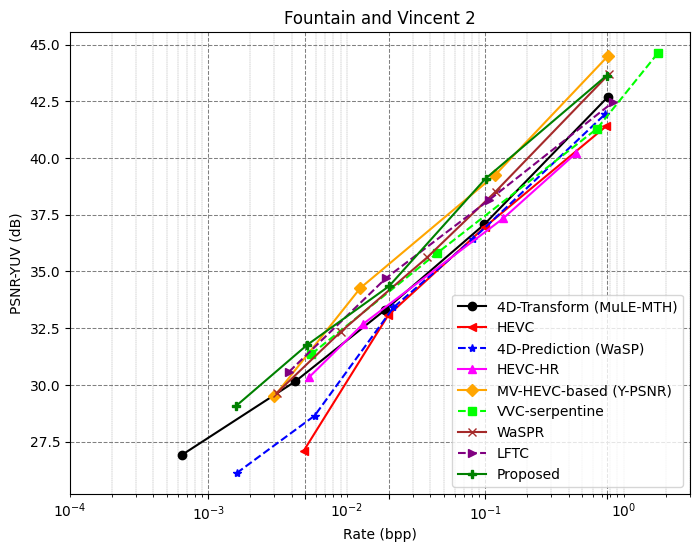

In [9]:

import numpy as np
import matplotlib.pyplot as plt



# Dataset
imageID = "Fountain and Vincent 2"

_4d_transform_bpp = np.array([0.0006442604753259924,0.004244550599649794, 0.018840000333684777,0.09852070435654695,0.7647071408024089])
_4d_transform_psnr = np.array([26.91489361702127, 30.153664302600472,  33.29787234042553, 37.08037825059101, 42.68321513002364])

hevc_bpp = np.array([0.004890129816668903, 0.01984881700650218,0.09925759636246842,0.7478016305274555])
hevc_psnr = np.array([27.104018912529547,  33.061465721040186, 36.96217494089834, 41.406619385342786])

_4d_prediction_bpp = np.array([0.0015991289849841559, 0.005847770111941956,0.021705489241995488,0.08177515184528747,0.731269853231323])
_4d_prediction_psnr = np.array([26.111111111111107,  28.640661938534276,  33.4160756501182,  36.44208037825059, 41.92671394799054])

hevc_hr_bpp = np.array([0.005347555982449618,0.013076901556727978,0.13472551059120694,0.45389764431538604])
hevc_hr_psnr = np.array([30.342789598108745, 32.68321513002364, 37.34042553191489, 40.22458628841608])

mv_hevc_based_bpp = np.array([0.0029903922282111897, 0.012505106035854079,0.11781413826272097,0.7704268175201983])
mv_hevc_based_psnr = np.array([29.49172576832151, 34.26713947990544, 39.25531914893617, 44.50354609929078])

vvc_bpp = np.array([0.005550557034417095, 0.04471831562372916, 0.6394774621219941, 1.7617922391811203])
vvc_psnr = np.array([31.359338061465714, 35.80378250591016, 41.28841607565012, 44.62174940898345])

waspr_bpp = np.array([0.0031039118940388256,0.009076717160063273,0.03795666316720757,0.11869533676041086, 0.7819948330170498])
waspr_psnr = np.array([29.633569739952716,  32.35224586288415,  35.61465721040189,  38.522458628841605,  43.69976359338061])


lftc_bpp = np.array([0.0038240562494176946,0.019265915183584968,0.10614266012766824,0.8300301178252122])
lftc_psnr = np.array([30.579196217494086,  34.716312056737586,  38.14420803782506,  42.44680851063829])

our_bpp  = np.array([0.001587216753470,0.005159545169471,0.020148490715240,0.100281384124560,0.751730635617484])
our_psnr = np.array([29.076007692307694, 31.758446153846155, 34.34880769230769, 39.08803076923077, 43.63383076923078])

fig, ax = plt.subplots(figsize=(8,6))
# Plotting the Graph
plt.plot(_4d_transform_bpp, _4d_transform_psnr, marker="o",  color='black', label="4D-Transform (MuLE-MTH)")
plt.plot(hevc_bpp, hevc_psnr, marker="<", color='red', label="HEVC")
plt.plot(_4d_prediction_bpp, _4d_prediction_psnr, marker="*", linestyle='dashed', color='blue', label="4D-Prediction (WaSP)")
plt.plot(hevc_hr_bpp, hevc_hr_psnr, marker='^',  color='magenta', label="HEVC-HR")
plt.plot(mv_hevc_based_bpp, mv_hevc_based_psnr, marker='D',  color='orange', label="MV-HEVC-based (Y-PSNR)")
plt.plot(vvc_bpp, vvc_psnr, marker='s', linestyle='dashed', color='lime', label="VVC-serpentine")
plt.plot(waspr_bpp, waspr_psnr, marker='x', color='brown', label="WaSPR")
plt.plot(lftc_bpp, lftc_psnr, marker='>', color='purple',linestyle='dashed', label="LFTC")
plt.plot(our_bpp, our_psnr, marker='P', color='green', label="Proposed")

plt.title(imageID)
plt.xlabel("Rate (bpp)")
plt.ylabel("PSNR-YUV (dB)")
plt.xscale('log')
plt.legend(loc='lower right')
a = np.arange(0.0001, 0.001, 0.0001)
b = np.arange(0.001, 0.01, 0.001)
c = np.arange(0.01, 0.1, 0.01)
d = np.arange(0.1, 1.0, 0.1)
e = np.arange(1.0, 4.0, 1.0)
f = np.concatenate((a,b,c,d,e), axis=-1)
ax.set_xticks([ 0.001, 0.005, 0.02, 0.1, 0.75])
ax.grid(which='major', linestyle='dashed', linewidth='0.75', color='gray')
ax.set_xticks(f, minor=True)
ax.grid(which='minor', linestyle='dashed', linewidth='0.25', color='gray')
plt.savefig(imageID+'.eps', format='eps',bbox_inches='tight')
plt.show()

In [10]:
#Fountain
our_bpp_fountain  = np.array([0.001587216753470,0.005159545169471,0.020148490715240,0.100281384124560,0.751730635617484])
our_psnr_fountain = np.array([29.076007692307694, 31.758446153846155, 34.34880769230769, 39.08803076923077, 43.63383076923078])

hevc_bpp = np.array([0.004890129816668903, 0.01984881700650218,0.09925759636246842,0.7478016305274555])
hevc_psnr = np.array([27.104018912529547,  33.061465721040186, 36.96217494089834, 41.406619385342786])

print('BD-RATE: ', BD_RATE(hevc_bpp, hevc_psnr, our_bpp_fountain, our_psnr_fountain, 1))

BD-RATE:  -57.164690767185135


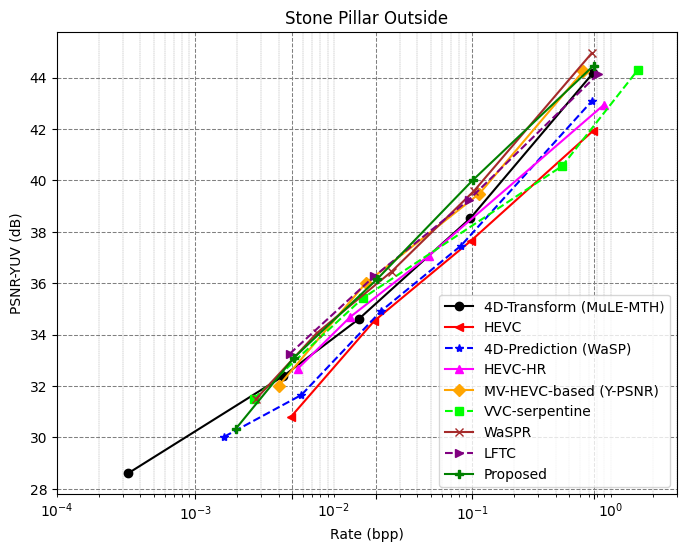

In [13]:

import numpy as np
import matplotlib.pyplot as plt



# Dataset
imageID = "Stone Pillar Outside"

_4d_transform_bpp = np.array([0.00032842176056757405,	0.004303311824915579,	0.015080083833139355,	0.09680894625777746,	0.7495565124602623])
_4d_transform_psnr = np.array([ 28.611428571428576,	 32.38285714285715,	 34.60000000000001,	 38.53142857142858,	 44.20000000000001])

hevc_bpp = np.array([0.00486419474950842, 0.01954698646334598,	0.09821442397538863,	0.7388301350738089])
hevc_psnr = np.array([30.782857142857146, 34.53142857142858,	 37.66285714285715,	 41.914285714285725])

_4d_prediction_bpp = np.array([0.0016148705525837056,	0.005824494184289979,	0.021936031418071072,	0.0826148089687311,	0.7335246460330318])
_4d_prediction_psnr = np.array([30.02857143,	 31.65142857142858,	 34.92,	 37.45714285714287,	 43.102857142857154	])

hevc_hr_bpp = np.array([0.005498181754841689,	0.0131503053496351,	0.04846698557041693,	0.8910903750458233	])
hevc_hr_psnr = np.array([ 32.68000000000001,	 34.69142857142858,	 37.068571428571445,	 42.94285714285715	])

mv_hevc_based_bpp = np.array([0.004004090754190254,	0.016923181144632884,	0.11262717539965325,	0.6305027874896512	])
mv_hevc_based_psnr = np.array([ 32.017142857142865,	 35.99428571428572,	 39.49142857142858,	 44.24571428571429	])

vvc_bpp = np.array([0.0026552178346588716,	0.016207001055596786,	0.4461205913168749,	1.574646595684257	])
vvc_psnr = np.array([ 31.51428571428572,	 35.42285714285715,	 40.56571428571429,	 44.314285714285724	])

waspr_bpp = np.array([0.0027328746886507455,	0.007495565124602616,	0.02607806901602,	0.10329623848370911,	0.7282572553488699	])
waspr_psnr = np.array([ 31.491428571428578,	 34.05142857142858,	 36.45142857142858,	 39.60571428571429,	 44.954285714285724	])

lftc_bpp = np.array([0.0047945866710018764,	0.019546986463345958,	0.09405804141904908,	0.8055700036611747	])
lftc_psnr = np.array([ 33.251428571428576,	 36.268571428571434,	 39.24000000000001,	 44.13142857142858	])

our_bpp = np.array([0.001962948218035,0.005166525781910,0.020406075314264,0.100458517165217,0.750065585035312])
our_psnr = np.array([30.344138461538464, 33.11010769230769, 36.14628461538462, 40.00522307692308, 44.46865384615384])

fig, ax = plt.subplots(figsize=(8,6))
# Plotting the Graph
plt.plot(_4d_transform_bpp, _4d_transform_psnr, marker="o",  color='black', label="4D-Transform (MuLE-MTH)")
plt.plot(hevc_bpp, hevc_psnr, marker="<", color='red', label="HEVC")
plt.plot(_4d_prediction_bpp, _4d_prediction_psnr, marker="*", linestyle='dashed', color='blue', label="4D-Prediction (WaSP)")
plt.plot(hevc_hr_bpp, hevc_hr_psnr, marker='^',  color='magenta', label="HEVC-HR")
plt.plot(mv_hevc_based_bpp, mv_hevc_based_psnr, marker='D',  color='orange', label="MV-HEVC-based (Y-PSNR)")
plt.plot(vvc_bpp, vvc_psnr, marker='s', linestyle='dashed', color='lime', label="VVC-serpentine")
plt.plot(waspr_bpp, waspr_psnr, marker='x', color='brown', label="WaSPR")
plt.plot(lftc_bpp, lftc_psnr, marker='>', color='purple',linestyle='dashed', label="LFTC")
plt.plot(our_bpp, our_psnr, marker='P', color='green', label="Proposed")
plt.title(imageID)
plt.xlabel("Rate (bpp)")
plt.ylabel("PSNR-YUV (dB)")
plt.xscale('log')
plt.legend(loc='lower right')
a = np.arange(0.0001, 0.001, 0.0001)
b = np.arange(0.001, 0.01, 0.001)
c = np.arange(0.01, 0.1, 0.01)
d = np.arange(0.1, 1.0, 0.1)
e = np.arange(1.0, 4.0, 1.0)
f = np.concatenate((a,b,c,d,e), axis=-1)
ax.set_xticks([ 0.001, 0.005, 0.02, 0.1, 0.75])
ax.grid(which='major', linestyle='dashed', linewidth='0.75', color='gray')
ax.set_xticks(f, minor=True)
ax.grid(which='minor', linestyle='dashed', linewidth='0.25', color='gray')
plt.savefig(imageID+'.png', format='png',bbox_inches='tight')
plt.show()

In [12]:
#Stone
our_bpp_stone = np.array([0.001962948218035,0.005166525781910,0.020406075314264,0.100458517165217,0.750065585035312])
our_psnr_stone = np.array([30.344138461538464, 33.11010769230769, 36.14628461538462, 40.00522307692308, 44.46865384615384])


hevc_bpp = np.array([0.00486419474950842, 0.01954698646334598,	0.09821442397538863,	0.7388301350738089])
hevc_psnr = np.array([30.782857142857146, 34.53142857142858,	 37.66285714285715,	 41.914285714285725])

print('BD-RATE: ', BD_RATE(hevc_bpp, hevc_psnr, our_bpp_stone, our_psnr_stone, 1))

BD-RATE:  -58.70135936624943
